In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
dataset = pd.read_csv('F:\Data science\My Project\car data.csv')
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# Find basic info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
#Describe data
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
#Check for duplicates
dataset.duplicated().sum()

2

In [6]:
# Identify the duplicates
duplicates_mask = dataset.duplicated(keep = False)
duplicate_rows = dataset[duplicates_mask]
print(duplicate_rows)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
15      Dealer       Manual      0  
17      Dealer       Manual      0  
51      Dealer    Automatic      0  
93      Dealer    Automatic      0  


In [7]:
#Drop the duplicates
dataset = dataset.drop_duplicates(keep = 'first')

In [8]:
#Print dataset
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
dataset.count()

Car_Name         299
Year             299
Selling_Price    299
Present_Price    299
Kms_Driven       299
Fuel_Type        299
Seller_Type      299
Transmission     299
Owner            299
dtype: int64

In [10]:
# check for null values
dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# statistical analysis
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


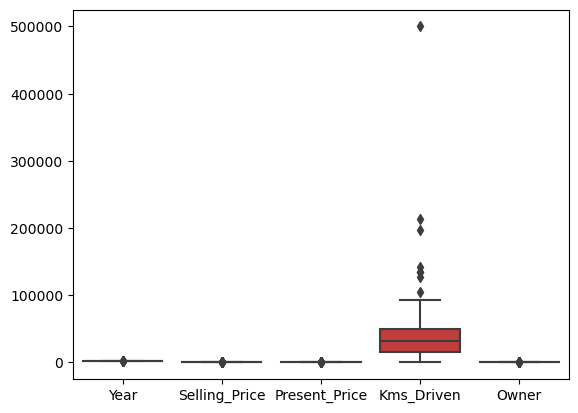

In [12]:
# check for outliers
sns.boxplot(dataset)
plt.show()

#Kms_Driven shows outliers. Use MinMaxScaler for feature scaling

#Let's find some unique value counts for object datatypes

In [13]:
dataset['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [14]:
dataset['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [15]:
dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [16]:
dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [17]:
dataset['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [18]:
dataset['Seller_Type'].value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [19]:
dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
dataset['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [21]:
#Convert objects into numerical values using Label encoder
le = LabelEncoder()
for columns in dataset.columns:
    if dataset[columns].dtypes == object:
        dataset[columns] = le.fit_transform(dataset[columns])
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [22]:
#check datatypes
dataset.dtypes

Car_Name           int32
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int32
Seller_Type        int32
Transmission       int32
Owner              int64
dtype: object

In [23]:
#Let's find the correlation between the variables
dataset.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.014713,0.501429,0.474856,0.064077,-0.368454,-0.829255,-0.055072,-0.080579
Year,0.014713,1.000000,0.234369,-0.053563,-0.525714,-0.046210,-0.036820,0.003434,-0.181639
Selling_Price,0.501429,0.234369,1.000000,0.876378,0.028566,-0.500292,-0.553851,-0.348869,-0.087880
Present_Price,0.474856,-0.053563,0.876378,1.000000,0.205253,-0.431809,-0.511686,-0.334265,0.009947
Kms_Driven,0.064077,-0.525714,0.028566,0.205253,1.000000,-0.167287,-0.101030,-0.163881,0.089367
Fuel_Type,-0.368454,-0.046210,-0.500292,-0.431809,-0.167287,1.000000,0.347922,0.068618,0.054174
Seller_Type,-0.829255,-0.036820,-0.553851,-0.511686,-0.101030,0.347922,1.000000,0.058669,0.123646
Transmission,-0.055072,0.003434,-0.348869,-0.334265,-0.163881,0.068618,0.058669,1.000000,-0.052166
Owner,-0.080579,-0.181639,-0.087880,0.009947,0.089367,0.054174,0.123646,-0.052166,1.000000


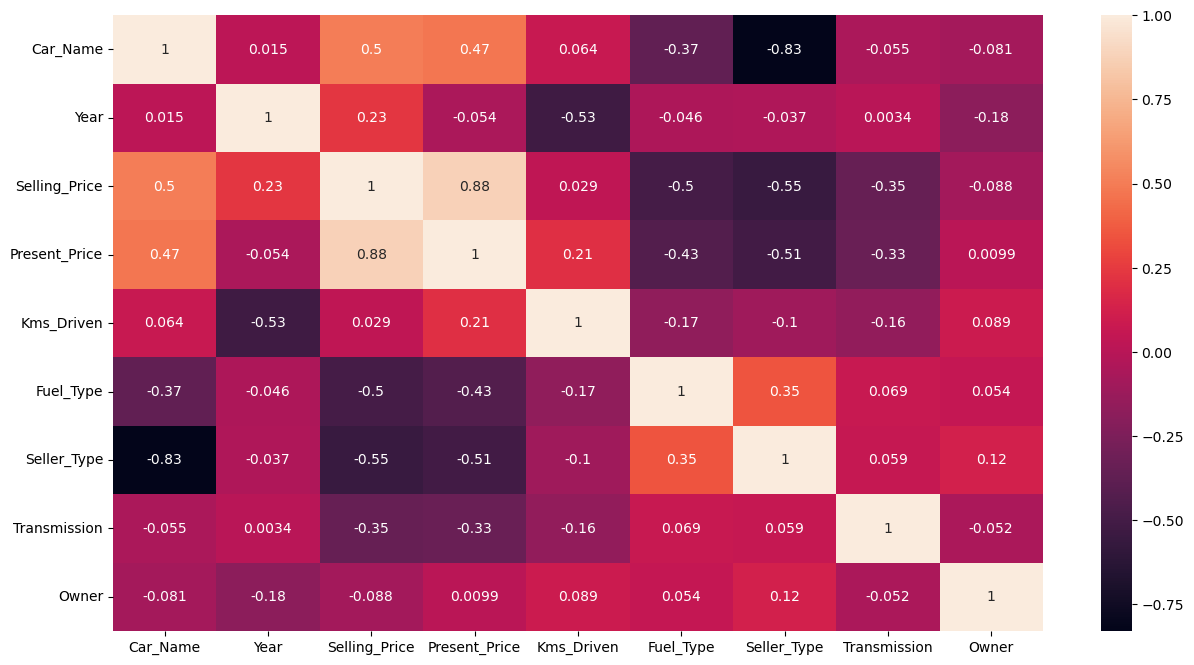

In [24]:
#heat map for visual correlation
plt.figure(figsize = (15,8))
sns.heatmap(dataset.corr(),annot =True)
plt.show()

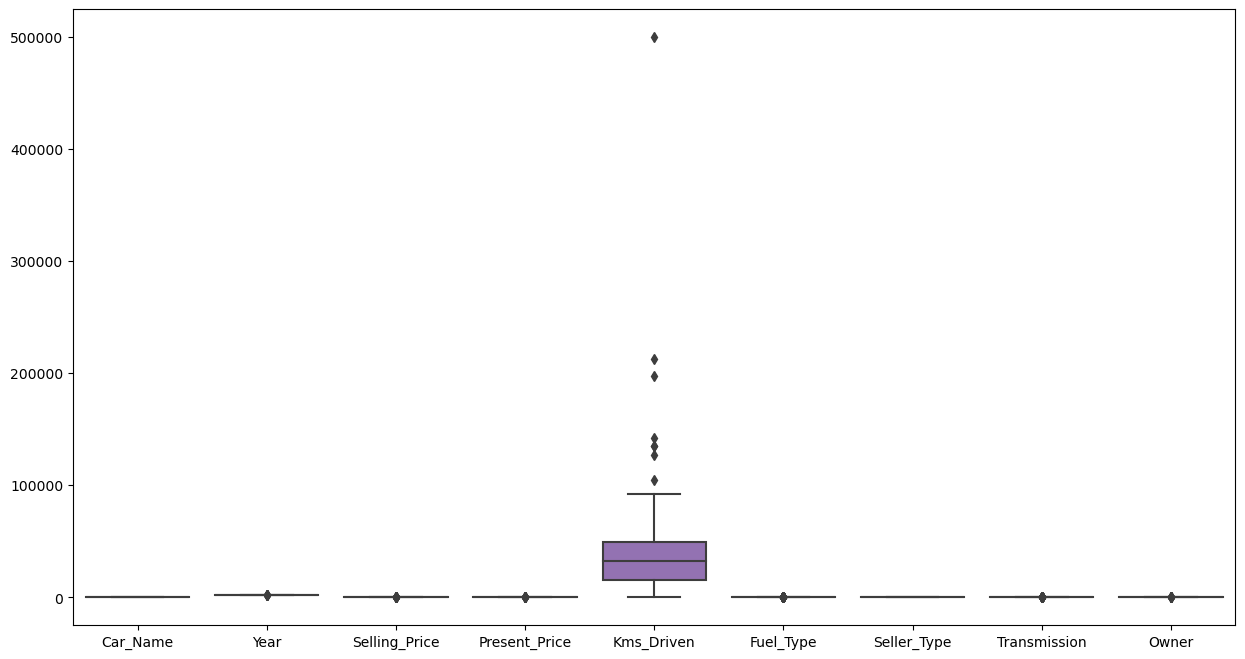

In [25]:
plt.figure(figsize = (15,8))
sns.boxplot(dataset)
plt.show()

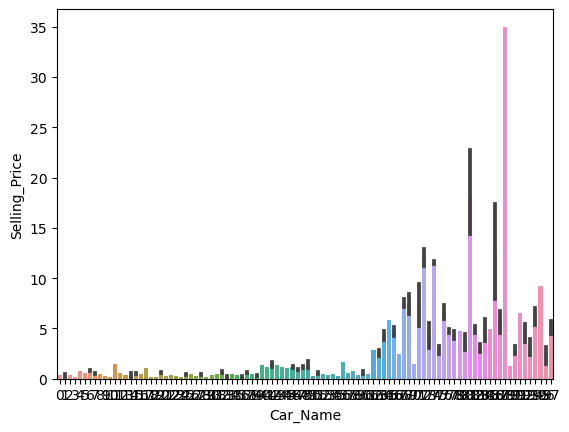

In [26]:
# Find relation between car name and selling price
sns.barplot(x = 'Car_Name', y = 'Selling_Price', data = dataset)
plt.show()

#Car_Name doesn't have major impact on selling price except a few, so, let's drop the Car_Name

In [27]:
#Drop Car_Name
dataset = dataset.drop(['Car_Name'],axis = 1)
dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [28]:
#convert the year to age of the car
dataset['Age'] = 2023 - dataset['Year']
dataset['Age']

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: Age, Length: 299, dtype: int64

In [29]:
#print dataset
dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,2,0,1,0,9
1,2013,4.75,9.54,43000,1,0,1,0,10
2,2017,7.25,9.85,6900,2,0,1,0,6
3,2011,2.85,4.15,5200,2,0,1,0,12
4,2014,4.60,6.87,42450,1,0,1,0,9
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0,7
297,2015,4.00,5.90,60000,2,0,1,0,8
298,2009,3.35,11.00,87934,2,0,1,0,14
299,2017,11.50,12.50,9000,1,0,1,0,6


In [30]:
#Drop year column
dataset = dataset.drop(['Year'],axis = 1)
dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0,7
297,4.00,5.90,60000,2,0,1,0,8
298,3.35,11.00,87934,2,0,1,0,14
299,11.50,12.50,9000,1,0,1,0,6


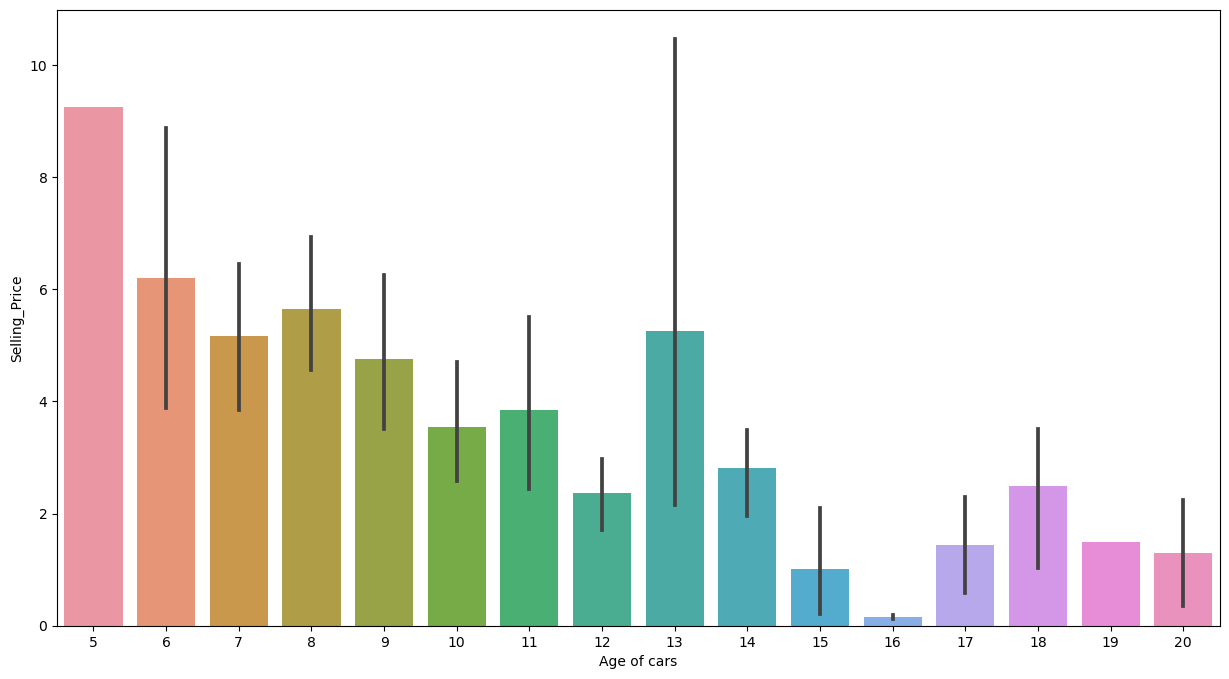

In [31]:
# visula representation of impact of age of cars on selling price
plt.figure(figsize = (15,8))
sns.barplot(x = 'Age', y = 'Selling_Price', data = dataset)
plt.xlabel('Age of cars')
plt.show()

#Mostly when the age is less, the selling price is high

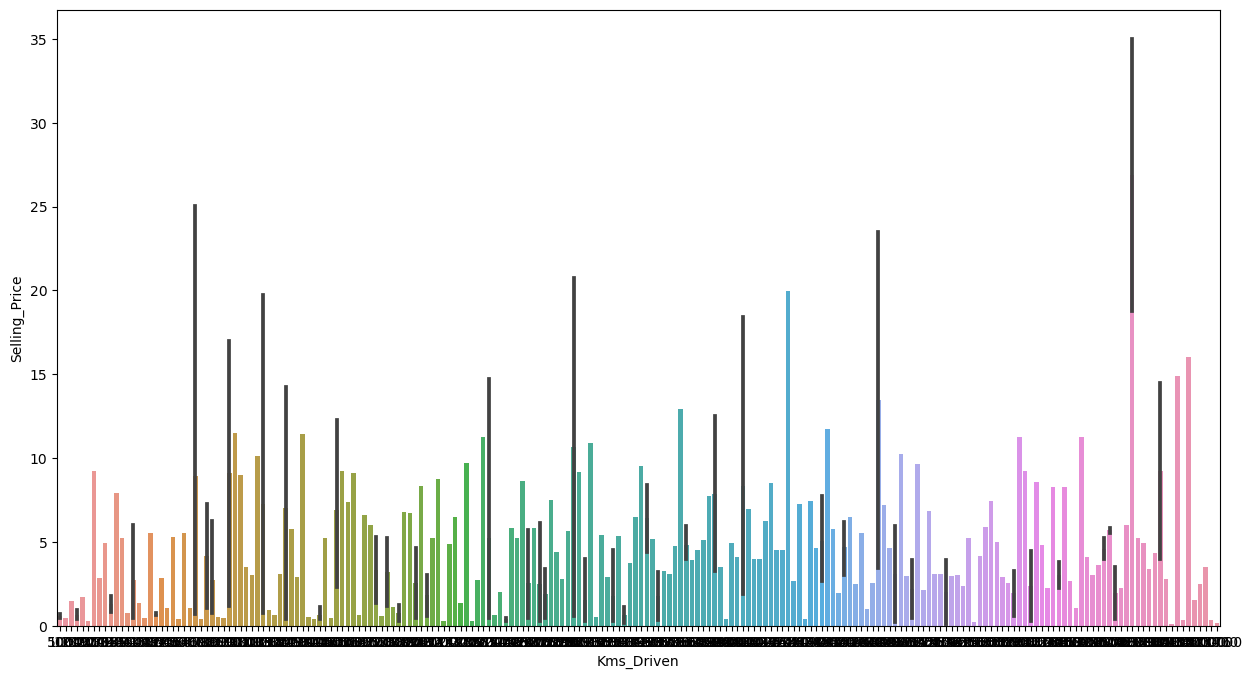

In [32]:
#impact of kms driven on selling price
plt.figure(figsize = (15,8))
sns.barplot(x = 'Kms_Driven', y = 'Selling_Price', data = dataset)
plt.show()

#Data visualization

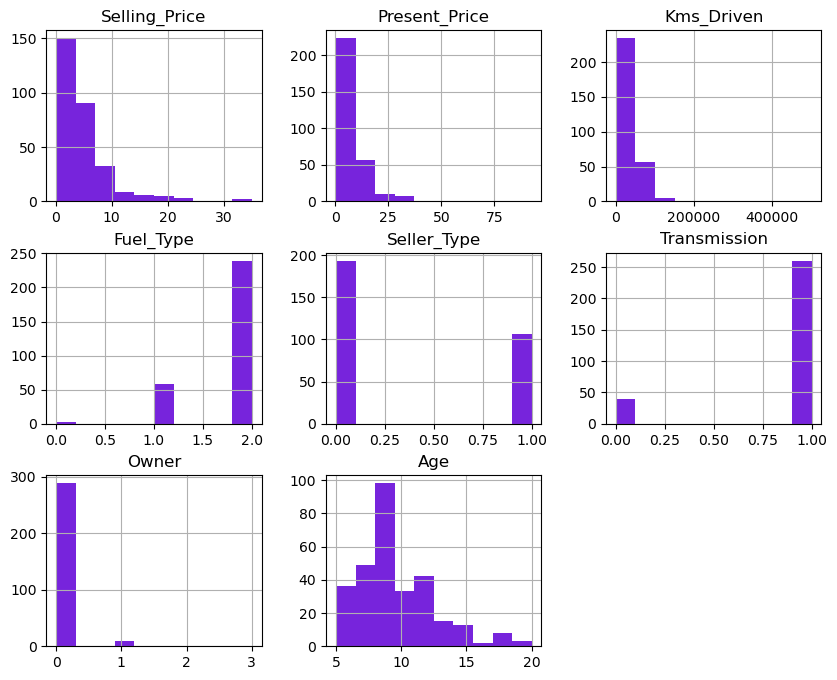

In [33]:

dataset.hist(color = '#7724DC',figsize = (10,8))
plt.show()

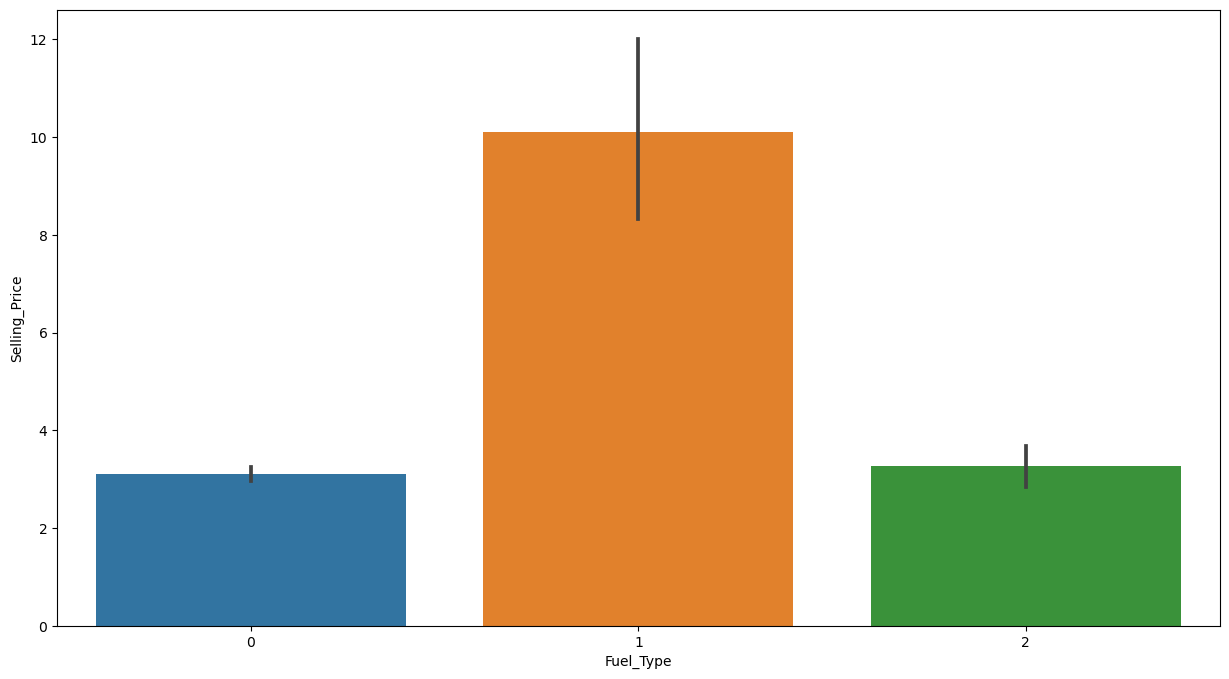

In [34]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = dataset)
plt.show()

#Diesel cars are sold the most.

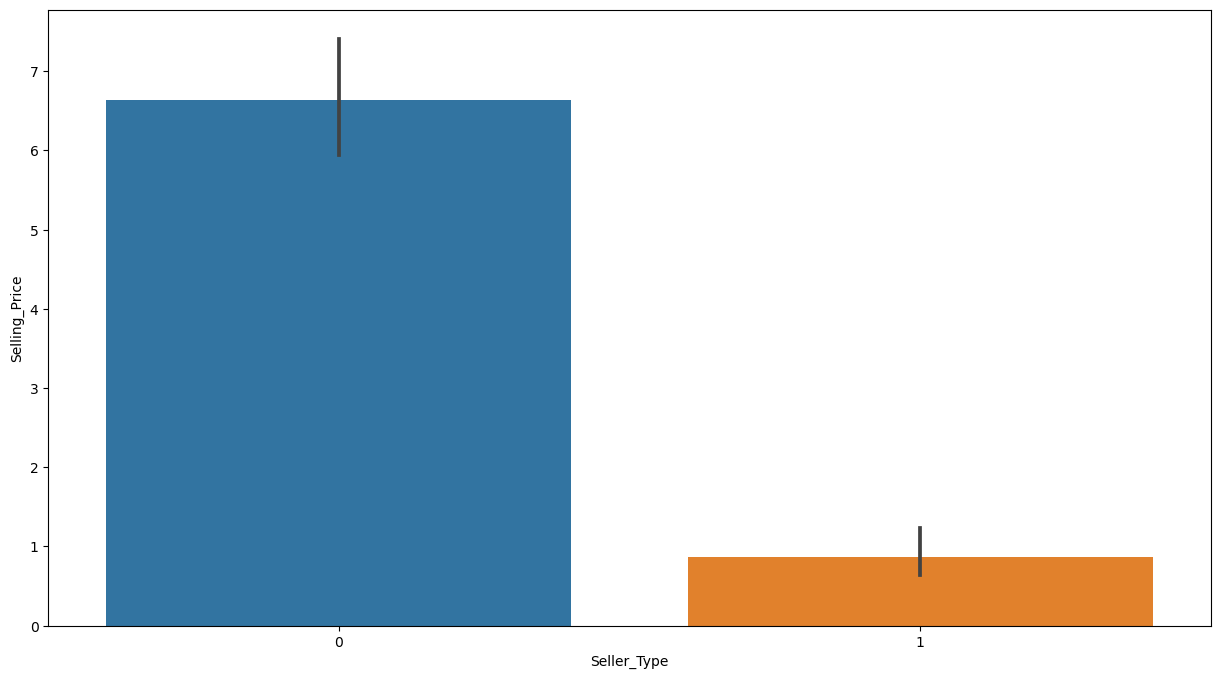

In [35]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Seller_Type', y = 'Selling_Price', data = dataset)
plt.show()

#Most cars are sold through dealers.

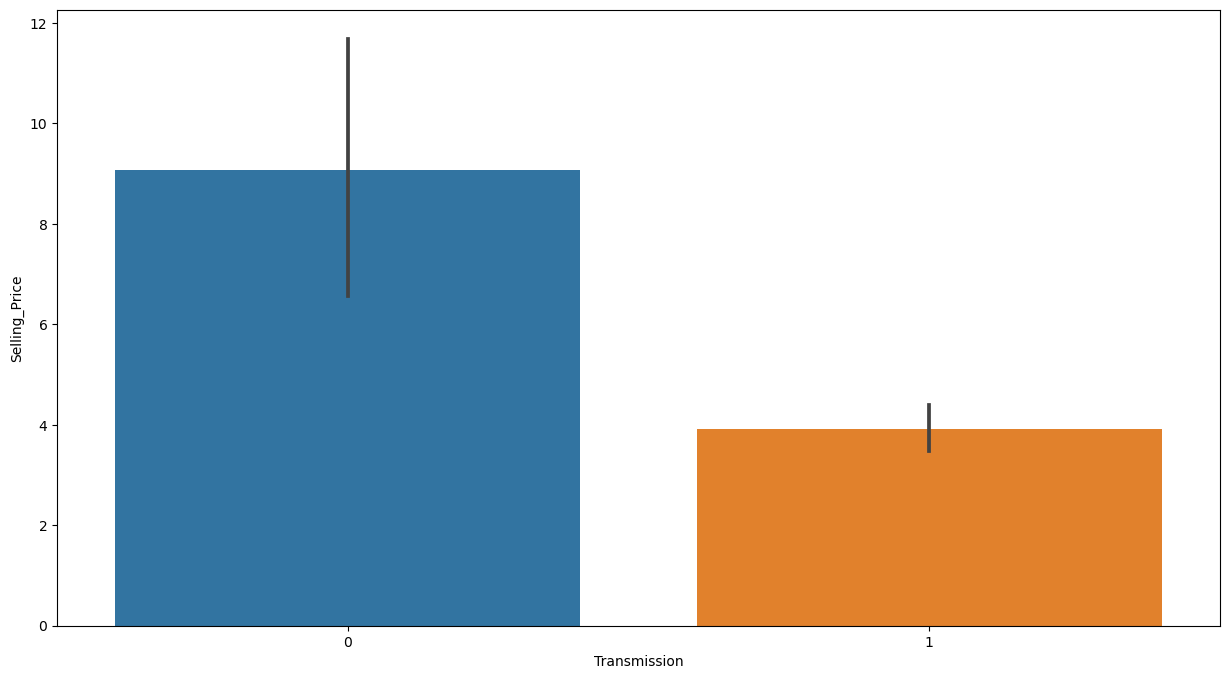

In [36]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Transmission', y = 'Selling_Price', data = dataset)
plt.show()

#Manual cars are sold the most.

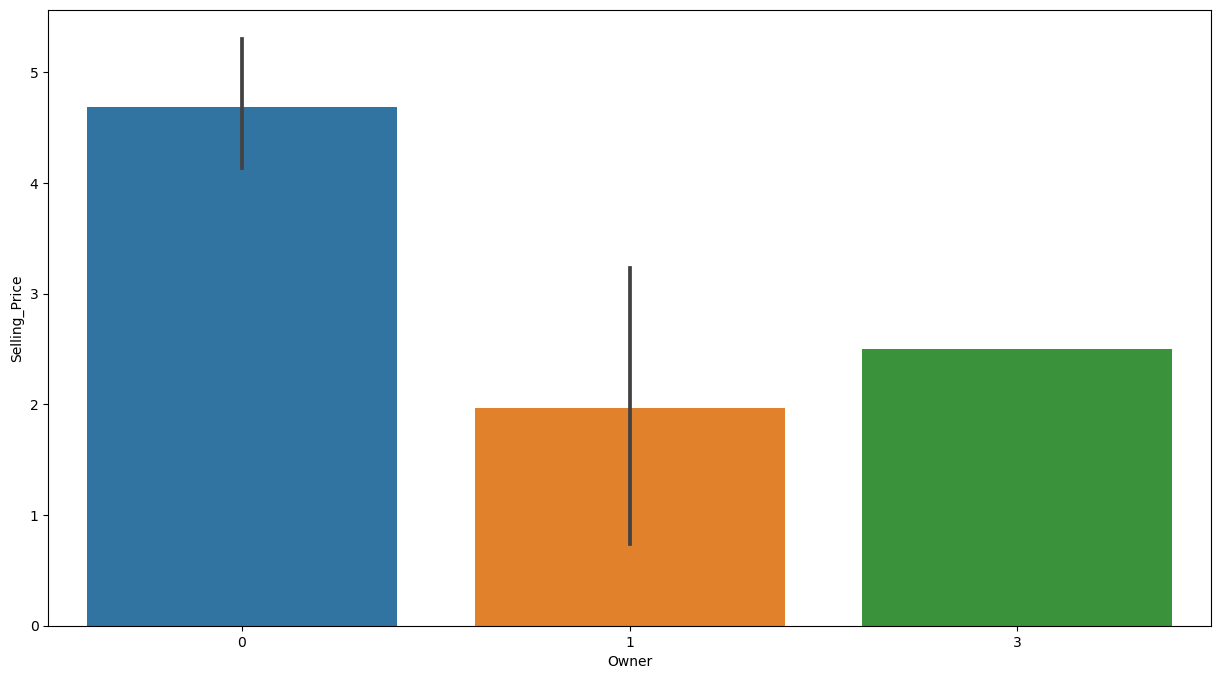

In [37]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Owner', y = 'Selling_Price', data = dataset)
plt.show()

# Car with Single owner got good selling price.

In [38]:
dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0,7
297,4.00,5.90,60000,2,0,1,0,8
298,3.35,11.00,87934,2,0,1,0,14
299,11.50,12.50,9000,1,0,1,0,6


In [39]:
#Target variable(Dependent)
y = dataset['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [40]:
#Independent variables
x = dataset.iloc[:,1:]
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,0,1,0,9
1,9.54,43000,1,0,1,0,10
2,9.85,6900,2,0,1,0,6
3,4.15,5200,2,0,1,0,12
4,6.87,42450,1,0,1,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,1,0,7
297,5.90,60000,2,0,1,0,8
298,11.00,87934,2,0,1,0,14
299,12.50,9000,1,0,1,0,6


In [41]:
#Feature scaling
mms = MinMaxScaler()
mms = mms.fit_transform(x)
mms

array([[0.0571088 , 0.05305305, 1.        , ..., 1.        , 0.        ,
        0.26666667],
       [0.09991331, 0.08508509, 0.5       , ..., 1.        , 0.        ,
        0.33333333],
       [0.10327265, 0.01281281, 1.        , ..., 1.        , 0.        ,
        0.06666667],
       ...,
       [0.11573472, 0.17504304, 1.        , ..., 1.        , 0.        ,
        0.6       ],
       [0.1319896 , 0.01701702, 0.5       , ..., 1.        , 0.        ,
        0.06666667],
       [0.06046814, 0.00993794, 1.        , ..., 1.        , 0.        ,
        0.13333333]])

In [42]:
print(pd.DataFrame(mms))

            0         1    2    3    4    5         6
0    0.057109  0.053053  1.0  0.0  1.0  0.0  0.266667
1    0.099913  0.085085  0.5  0.0  1.0  0.0  0.333333
2    0.103273  0.012813  1.0  0.0  1.0  0.0  0.066667
3    0.041504  0.009409  1.0  0.0  1.0  0.0  0.466667
4    0.070980  0.083984  0.5  0.0  1.0  0.0  0.266667
..        ...       ...  ...  ...  ...  ...       ...
294  0.122237  0.067043  0.5  0.0  1.0  0.0  0.133333
295  0.060468  0.119119  1.0  0.0  1.0  0.0  0.200000
296  0.115735  0.175043  1.0  0.0  1.0  0.0  0.600000
297  0.131990  0.017017  0.5  0.0  1.0  0.0  0.066667
298  0.060468  0.009938  1.0  0.0  1.0  0.0  0.133333

[299 rows x 7 columns]


In [43]:
#Split the data
x_train,x_test,y_train,y_test = train_test_split(mms,y,test_size = 0.2,random_state = 42)

In [44]:
x_train.shape

(239, 7)

In [45]:
x_test.shape

(60, 7)

In [46]:
y_train.shape

(239,)

In [47]:
y_test.shape

(60,)

#Let's try various regression algorithms to find which model predicts better accuracy

In [48]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_pred

array([ 7.54152814,  7.60857724,  1.36207444,  6.83885956, 11.26245861,
        4.54359165,  8.5845709 ,  1.70919963,  8.64713023, -0.9418582 ,
       10.14013852, -1.01376769,  0.67029971,  1.5607731 ,  5.06402181,
        5.09326915,  1.318749  ,  1.85805879, 21.49461753,  0.88470811,
        0.94090952,  2.51123502,  5.61315878,  0.21025908,  6.08428367,
        7.8732071 ,  8.54440355,  1.19083798,  4.85632094,  4.97326934,
        6.43678966,  5.58662973,  6.09158985,  2.71784907,  2.94274014,
        6.78577292,  1.27045665, -4.49322868,  1.41871851, 10.46994115,
        7.19327321,  8.88334013,  1.63138446,  4.06239467,  0.9789177 ,
       -2.1994379 ,  8.20793597,  4.37869605,  5.66258318, -0.58052448,
        0.6493802 ,  0.18243912, 10.51896108,  9.30755118,  7.35828716,
        6.11959265,  3.71478938,  3.46322264,  9.41844481,  9.22737715])

In [49]:
r2_score(y_test,lr_pred)

0.7410829335731298

In [50]:
mean_squared_error(y_test,lr_pred)

6.673137446828255

In [51]:
mean_absolute_error(y_test,lr_pred)

1.541071812283763

In [52]:
rr = Ridge()
rr.fit(x_train,y_train)
rr_pred = rr.predict(x_test)
rr_pred

array([ 6.50553103,  8.02544767,  1.16922318,  7.58486488, 10.21137623,
        4.72896442,  6.93549845,  1.40009544,  8.75450446, -0.34875422,
        8.92353548, -0.69269357,  2.15905146,  1.45668259,  4.75264814,
        5.15821103,  1.24990503,  1.47167324, 17.85615139,  0.91660269,
        0.92086621,  1.39236642,  5.45496516,  1.51384483,  7.06361522,
        6.63939499,  8.52914949,  1.07546769,  4.66971778,  4.95743462,
        8.7613087 ,  5.14218923,  7.06416948,  3.27915442,  3.83237451,
        7.5140934 ,  1.08150768,  1.2096489 ,  1.35652872,  9.58279958,
        6.26265267,  8.71744248,  1.3425193 ,  5.73571284,  0.91944349,
       -1.60410382,  6.94363297,  4.54526226,  7.16961961, -0.10213718,
        0.6084943 ,  0.24750554,  6.99583553,  9.05861127,  6.32148746,
        7.25360834,  4.021176  ,  4.08285703,  9.04439068,  7.26310762])

In [53]:
r2_score(y_test,rr_pred)

0.7022607853319298

In [54]:
mean_squared_error(y_test,rr_pred)

7.673710853478687

In [55]:
mean_absolute_error(y_test,rr_pred)

1.4955287079205408

In [56]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_pred

array([10.11,  8.75,  0.45,  6.45,  9.25,  5.3 ,  5.9 ,  1.2 ,  7.9 ,
        0.2 ,  9.25,  0.25,  0.25,  0.48,  4.  ,  6.1 ,  0.6 ,  1.05,
       23.  ,  0.55,  0.55,  2.5 ,  6.6 ,  2.55,  5.65,  8.65, 11.25,
        1.1 ,  4.5 ,  5.95,  3.35,  4.4 ,  5.65,  2.7 ,  4.  ,  5.95,
        1.15,  0.1 ,  1.1 ,  9.25,  7.45, 11.25,  1.05,  3.6 ,  0.55,
        0.2 ,  9.15,  5.3 ,  3.5 ,  0.2 ,  0.65,  0.3 ,  9.25, 11.25,
        7.05,  8.25,  2.9 ,  3.45, 11.25,  7.05])

In [57]:
r2_score(y_test,dt_pred)

0.8400468944215056

In [58]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([ 9.5206,  8.3105,  0.4427,  6.867 , 16.8879,  5.2975,  6.4783,
        1.172 ,  7.906 ,  0.336 , 13.1224,  0.2161,  0.2454,  0.4627,
        4.414 ,  5.3715,  0.6005,  1.151 , 21.5567,  0.5633,  0.5594,
        2.4875,  6.2775,  2.3545,  6.1585,  9.1053,  8.5165,  1.162 ,
        4.7401,  5.3753,  3.5695,  4.457 ,  6.131 ,  2.7405,  3.2885,
        6.6331,  1.1575,  0.1617,  1.1655, 16.4649,  6.6816,  9.1658,
        0.8804,  3.5088,  0.5576,  0.2043,  9.7335,  4.8025,  3.9695,
        0.2095,  0.5948,  0.3254, 17.0295, 10.1959,  7.9206,  6.8355,
        3.1185,  3.721 , 10.3372,  7.3302])

In [59]:
r2_score(y_test,rf_pred)

0.5532177838652426

In [60]:
x_train,x_test,y_train,y_test = train_test_split(mms,y,test_size = 0.2,random_state = 42)

In [61]:
rf = RandomForestRegressor(n_estimators = 200)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([ 9.44685,  8.1945 ,  0.43415,  6.8255 , 16.90745,  5.266  ,
        6.63325,  1.1635 ,  8.0045 ,  0.328  , 13.99555,  0.2146 ,
        0.24485,  0.4561 ,  4.38625,  5.3323 ,  0.60975,  1.1525 ,
       21.6861 ,  0.55135,  0.5541 ,  2.39025,  6.248  ,  2.3295 ,
        6.15575,  9.20385,  9.16635,  1.1415 ,  4.7889 ,  5.349  ,
        3.43325,  4.38525,  6.1295 ,  2.6895 ,  3.16425,  6.5325 ,
        1.14825,  0.16115,  1.15425, 16.8167 ,  7.12355,  9.29915,
        0.94225,  3.46295,  0.55395,  0.20165,  9.94365,  4.99275,
        4.0228 ,  0.2089 ,  0.5866 ,  0.318  , 17.4737 , 10.1752 ,
        7.86635,  6.94625,  3.15275,  3.69725, 10.621  ,  7.4054 ])

In [62]:
r2_score(y_test,rf_pred)

0.5365689864956296

In [63]:
x_train,x_test,y_train,y_test = train_test_split(mms,y,test_size = 0.2,random_state = 42)

In [64]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_pred

array([10.11,  8.75,  0.45,  6.45,  9.25,  5.4 ,  5.9 ,  1.2 ,  7.25,
        0.15,  9.25,  0.25,  0.27,  0.45,  4.  ,  6.1 ,  0.6 ,  1.1 ,
       23.  ,  0.6 ,  0.6 ,  2.5 ,  6.6 ,  2.55,  4.75,  8.65, 11.25,
        1.1 ,  4.5 ,  5.11,  4.  ,  4.4 ,  4.75,  2.7 ,  4.  ,  5.95,
        1.15,  0.1 ,  1.1 ,  9.25,  7.5 , 11.25,  1.05,  3.51,  0.6 ,
        0.2 ,  9.15,  5.3 ,  3.5 ,  0.15,  0.65,  0.3 ,  9.25, 11.25,
        7.5 ,  8.25,  2.9 ,  3.45, 11.25,  7.05])

In [65]:
r2_score(y_test,dt_pred)

0.8378708666897512

In [66]:
x_train,x_test,y_train,y_test = train_test_split(mms,y,test_size = 0.2,random_state = 42)

In [67]:
rr = Ridge()
rr.fit(x_train,y_train)
rr_pred = rr.predict(x_test)
rr_pred

array([ 6.50553103,  8.02544767,  1.16922318,  7.58486488, 10.21137623,
        4.72896442,  6.93549845,  1.40009544,  8.75450446, -0.34875422,
        8.92353548, -0.69269357,  2.15905146,  1.45668259,  4.75264814,
        5.15821103,  1.24990503,  1.47167324, 17.85615139,  0.91660269,
        0.92086621,  1.39236642,  5.45496516,  1.51384483,  7.06361522,
        6.63939499,  8.52914949,  1.07546769,  4.66971778,  4.95743462,
        8.7613087 ,  5.14218923,  7.06416948,  3.27915442,  3.83237451,
        7.5140934 ,  1.08150768,  1.2096489 ,  1.35652872,  9.58279958,
        6.26265267,  8.71744248,  1.3425193 ,  5.73571284,  0.91944349,
       -1.60410382,  6.94363297,  4.54526226,  7.16961961, -0.10213718,
        0.6084943 ,  0.24750554,  6.99583553,  9.05861127,  6.32148746,
        7.25360834,  4.021176  ,  4.08285703,  9.04439068,  7.26310762])

In [68]:
r2_score(y_test,rr_pred)

0.7022607853319298

In [69]:
x_train,x_test,y_train,y_test = train_test_split(mms,y,test_size = 0.2,random_state = 42)

In [70]:
xgb_reg = xgb.XGBRegressor(n_estimators = 2000,max_depth = 3, learning_rate = 0.1,random_state = 42)
xgb_reg.fit(x_train,y_train)
xgb_pred = xgb_reg.predict(x_test)
xgb_pred

array([ 9.077803  ,  8.996319  ,  0.37282306,  7.0702577 , 14.393018  ,
        4.4411674 ,  5.557044  ,  1.4775971 ,  8.060464  ,  0.32075873,
        9.604668  ,  0.28813717,  0.20833041,  0.63507736,  4.3422947 ,
        5.6324153 ,  0.6897466 ,  1.6171575 , 24.031017  ,  0.2533039 ,
        0.51973313,  3.0139232 ,  6.504557  ,  1.9455115 ,  6.937603  ,
        8.846605  , 10.4744425 ,  1.121797  ,  4.517041  ,  4.717249  ,
        2.6114216 ,  4.345617  ,  6.951309  ,  2.6165323 ,  3.303535  ,
        6.342671  ,  1.1407527 ,  0.1759961 ,  1.0703869 ,  9.7878275 ,
        7.7311735 ,  9.108771  ,  1.0431383 ,  2.7928846 ,  0.44617602,
        0.12245332,  9.785612  ,  4.587187  ,  4.014086  ,  0.05746806,
        0.53205824,  0.18662825, 11.072473  , 10.508118  ,  7.886292  ,
        6.877647  ,  3.020449  ,  3.6796854 , 12.579921  ,  6.993794  ],
      dtype=float32)

In [71]:
r2_score(y_test,xgb_pred)

0.7890545297656577

In [72]:
x_train,x_test,y_train,y_test = train_test_split(mms,y,test_size = 0.2,random_state = 42)

In [73]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred

array([ 7.582, 10.446,  0.944,  6.91 ,  6.412,  5.54 ,  5.77 ,  0.92 ,
       10.446,  0.474,  5.85 ,  0.534,  0.376,  0.772,  4.39 ,  4.61 ,
        0.7  ,  0.974, 21.65 ,  0.732,  0.92 ,  0.47 ,  6.18 ,  2.412,
        5.5  ,  8.13 ,  8.85 ,  0.876,  3.7  ,  4.61 ,  5.45 ,  4.62 ,
        5.5  ,  2.81 ,  4.12 ,  6.23 ,  0.92 ,  3.48 ,  0.64 ,  6.412,
        6.13 ,  8.27 ,  0.944,  5.272,  0.92 ,  0.32 ,  8.312,  4.09 ,
        5.782,  0.69 ,  0.52 ,  0.578,  3.43 ,  9.596,  6.33 ,  5.58 ,
        2.77 ,  4.12 ,  8.27 ,  6.13 ])

In [74]:
r2_score(y_test,knn_pred)

0.8355655835573955

RMSE value for k =  1 is:  0.8638881397155088
RMSE value for k =  2 is:  0.8214492777959035
RMSE value for k =  3 is:  0.8411904496258884
RMSE value for k =  4 is:  0.8446482109516943
RMSE value for k =  5 is:  0.8355655835573955
RMSE value for k =  6 is:  0.8168874334279936
RMSE value for k =  7 is:  0.8014392491258919
RMSE value for k =  8 is:  0.7850529102382418
RMSE value for k =  9 is:  0.7805317986800855
RMSE value for k =  10 is:  0.781252885203684
RMSE value for k =  11 is:  0.7607352564826032
RMSE value for k =  12 is:  0.7464442945235464
RMSE value for k =  13 is:  0.7251316445663116
RMSE value for k =  14 is:  0.7068464793327836
RMSE value for k =  15 is:  0.6746421344382625
RMSE value for k =  16 is:  0.6552471719547661
RMSE value for k =  17 is:  0.6214755781799114
RMSE value for k =  18 is:  0.5874894562868126
RMSE value for k =  19 is:  0.5513688461098962
RMSE value for k =  20 is:  0.512642360228533


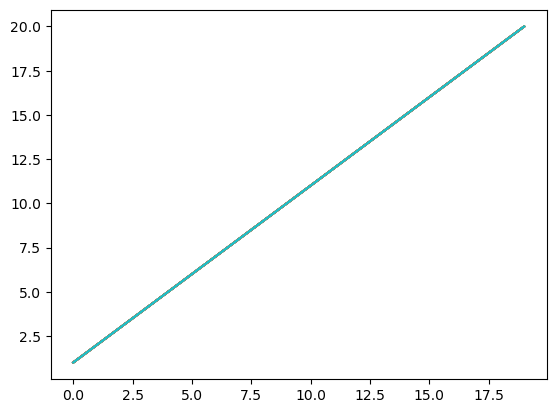

In [75]:
rmse_val = []
for k in range(20):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    acc = r2_score(y_test,knn_pred)
    rmse_val.append(acc)
    print('RMSE value for k = ', k, 'is: ', acc)
    plt.plot(range(1,21)),rmse_val

In [76]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred

array([10.11,  8.75,  0.72,  4.75,  3.6 ,  5.5 ,  5.9 ,  1.05, 11.5 ,
        0.52,  9.25,  0.45,  0.25,  0.65,  5.25,  4.5 ,  0.6 ,  1.75,
       23.  ,  0.18,  0.6 ,  0.2 ,  6.6 ,  2.1 ,  4.75,  8.65, 11.25,
        1.35,  4.5 ,  5.  ,  2.95,  5.25,  4.75,  2.7 ,  2.9 ,  4.75,
        1.15,  0.25,  0.5 ,  3.6 ,  7.45,  7.25,  1.05,  3.6 ,  0.6 ,
        0.2 ,  9.15,  5.3 ,  5.11,  1.  ,  0.4 ,  0.65,  0.25,  9.5 ,
        6.45,  6.  ,  3.1 ,  2.9 ,  8.55,  7.05])

In [77]:
r2_score(y_test,knn_pred)

0.8638881397155088

#KNeighborsRegressor gives better accuracy than other models